In [1]:
import os
import ipywidgets as widgets

import datetime
import xarray as xr

from download_sst import download_hw
from utils import plot_sst

rpath = './sst_raw/'
if not os.path.isdir(rpath): os.mkdir(rpath)

/Users/aponte/.miniconda3/envs/cognac/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


satpy not available


---

# Select date and time

In [2]:
wdate = widgets.DatePicker(
    description='Pick a Date',
    disabled=False)
wdate.value = datetime.datetime(2016,3,3)
#
whour = widgets.IntSlider(description='hour')
whour.max = 23
wmin = widgets.IntSlider(description='minutes')
wmin.max=50
wmin.min=0
wmin.step=10
#
display(wdate, whour, wmin)
#
tstart = wdate.value + datetime.timedelta(hours=whour.value, minutes=wmin.value)

DatePicker(value=datetime.datetime(2016, 3, 3, 0, 0), description='Pick a Date')

IntSlider(value=0, description='hour', max=23)

IntSlider(value=0, description='minutes', max=50, step=10)

In [57]:
style = {'description_width': 'initial'}

wcentering = widgets.Dropdown(
    options=['start', 'center', 'end'],
    value='center',
    description='Centering',
    disabled=False, style=style)
#
wdelt_d = widgets.IntSlider(description='days')
wdelt_d.min = 0
wdelt_d.max = 100
wdelt_d.step = 1
#
wdelt_h = widgets.IntSlider(description='hours')
wdelt_h.min = 0
wdelt_h.max = 23
wdelt_h.step = 1
wdelt_h.value = 0
#
print('Time interval')
display(wdelt_d, wdelt_h, wcentering)

Time interval


IntSlider(value=0, description='days')

IntSlider(value=0, description='hours', max=23)

Dropdown(description='Centering', index=1, options=('start', 'center', 'end'), style=DescriptionStyle(description_width='initial'), value='center')

---

# Download


In [58]:
delt = datetime.timedelta(days=wdelt_d.value, hours=wdelt_h.value)
if wcentering.value is 'center':
    tstart = wdate.value - delt/2.
elif wcentering.value is 'end':
    tstart = tstart - delt

print('start time: '+str(tstart))
print('time interval considered: '+ str(delt))
    
time = [tstart+datetime.timedelta(minutes=10*n) for n in range(int(delt.total_seconds()/60/10)+1)]

sstfiles = download_hw(time[:], rpath)

start time: 2016-03-07
time interval considered: 0:00:00
Logged in JAXA ftp
No sst file found, download from jaxa ftp: 20160307000000-JAXA-L2P_GHRSST-SSTskin-H08_AHI-v1.2-v02.0-fv01.0.nc


---

# Inspect data

In [59]:

print('Select a time')
options = [(i.strftime('%x %X'), i) for i in time]
wsel = widgets.SelectionSlider(
            options=options,
            value=tstart+delt/2.,
            description='',
            disabled=False,
            continuous_update=False,
            orientation='horizontal',
            readout=True,
            layout=widgets.Layout(min_width='800px'))
display(wsel)

#
print('Select a area')

wlon_w = widgets.FloatSlider(description='lon west :', min=-180., max=180., step=1., value=105.,
                             layout=widgets.Layout(min_width='800px')
)
wlon_e = widgets.FloatSlider(description='lon east :', min=-180., max=180., step=1., value=125.,
                             layout=widgets.Layout(min_width='800px')
)

wlat = widgets.FloatRangeSlider(
    value=[-35., -10.],
    min=-60.,
    max=60.,
    step=1.,
    description='lat range :',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.0f',
    layout=widgets.Layout(min_width='800px')
)

#
display(wlon_w, wlon_e)
hbox=widgets.HBox([wlat], layout=widgets.Layout(width='1000px', overflow_x='scroll'))
display(hbox)



Select a time


SelectionSlider(continuous_update=False, layout=Layout(min_width='800px'), options=(('03/07/16 00:00:00', datetime.date(2016, 3, 7)),), value=datetime.date(2016, 3, 7))

Select a area


FloatSlider(value=105.0, description='lon west :', layout=Layout(min_width='800px'), max=180.0, min=-180.0, step=1.0)

FloatSlider(value=125.0, description='lon east :', layout=Layout(min_width='800px'), max=180.0, min=-180.0, step=1.0)

HBox(children=(FloatRangeSlider(value=(-35.0, -10.0), continuous_update=False, description='lat range :', layout=Layout(min_width='800px'), max=60.0, min=-60.0, readout_format='.0f', step=1.0),), layout=Layout(overflow_x='scroll', width='1000px'))

In [60]:
ds = xr.open_dataset(sstfiles[time.index(wsel.value)])
#print(ds)
#
sst = ds['sea_surface_temperature'].isel(time=0)-273.15
sst = sst.where(sst>0)

/Users/aponte/.miniconda3/envs/cognac/lib/python3.6/site-packages/xarray/core/dtypes.py:23: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(dtype, float):


<xarray.DataArray 'sea_surface_temperature' (lat: 601, lon: 601)>
array([[26.599993, 27.269993, 27.499993, ..., 31.079993, 30.549993, 30.639993],
       [26.979993, 27.269993, 26.839993, ..., 30.909993, 30.369993, 30.529993],
       [27.329993, 27.319993, 26.969993, ..., 30.479993, 30.789993, 30.789993],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan]])
Coordinates:
    time     datetime64[ns] 2016-03-07T00:00:17
  * lat      (lat) float32 -18.0 -18.019997 -18.04 -18.059998 -18.080002 ...
  * lon      (lon) float32 105.0 105.02 105.04 105.06 105.08 105.1 ...


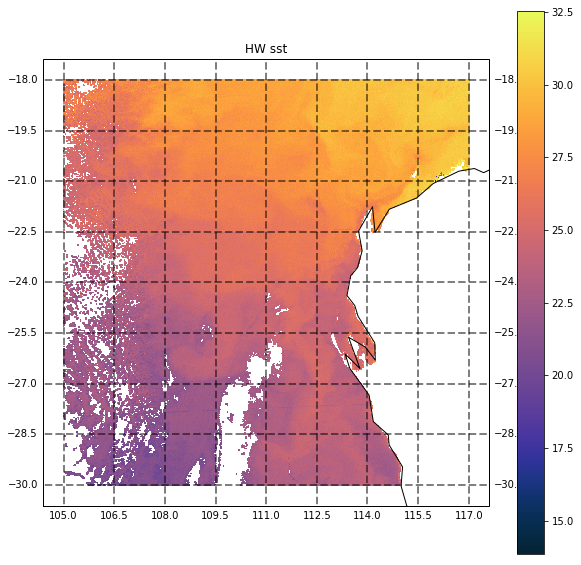

In [62]:
sst_z = sst.sel(lon=slice(wlon_w.value,wlon_e.value),lat=slice(wlat.value[1],wlat.value[0]))
print(sst_z)
plot_sst(sst_z)